In [ ]:
'''
Part of Speech Tagging:
The part of speech explains how a word is used in a sentence.
In a sentence, a word can have different contexts and semantic meanings.
The basic natural language processing models like bag-of-words fail to
identify these relations between words. Hence, we use part of speech tagging
 to mark a word to its part of speech tag based on its context in the data.
 It is also used to extract relationships between words.
'''

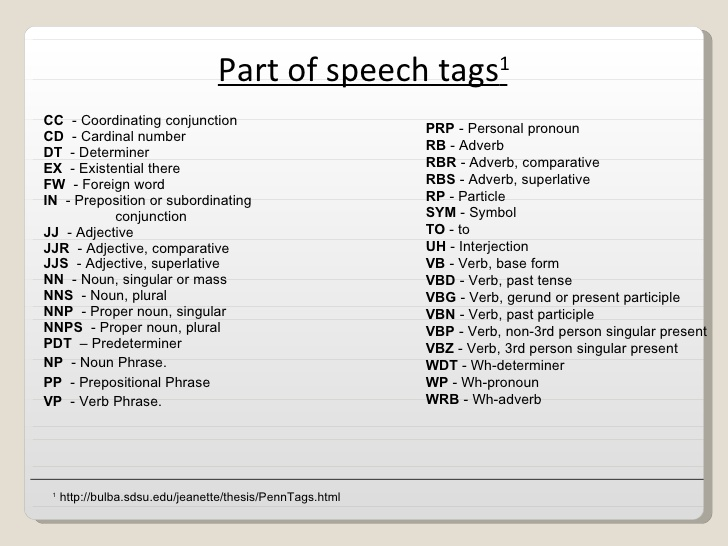

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# convert text into word_tokens with their tags
def pos_tagging(text):
	word_tokens = word_tokenize(text)
	return pos_tag(word_tokens)

pos_tagging('Natural language processing (NLP) is an interdisciplinary subfield of computer science and linguistics.')

[('Natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 ('(', '('),
 ('NLP', 'NNP'),
 (')', ')'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('interdisciplinary', 'JJ'),
 ('subfield', 'NN'),
 ('of', 'IN'),
 ('computer', 'NN'),
 ('science', 'NN'),
 ('and', 'CC'),
 ('linguistics', 'NNS'),
 ('.', '.')]

In [ ]:
#If you want to understand a specific information , this is another way!

# download the tagset
nltk.download('tagsets')

# extract information about the tag
nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('DT')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


'''
# **Chunking:**
Chunking is the process of extracting phrases from unstructured text
and more structure to it. It is also known as shallow parsing.
 It is done on top of Part of Speech tagging. It groups word into “chunks”,
  mainly of noun phrases. Chunking is done using regular expressions.
'''

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# define chunking function with text and regular
# expression representing grammar as parameter
def chunking(text, grammar):
	word_tokens = word_tokenize(text)

	# label words with part of speech
	word_pos = pos_tag(word_tokens)

	# create a chunk parser using grammar
	chunkParser = nltk.RegexpParser(grammar)

	# test it on the list of word tokens with tagged pos
	tree = chunkParser.parse(word_pos)

	for subtree in tree.subtrees():
		print(subtree)
	#tree.draw()

sentence = 'the nlp course is very intersting as days pass'
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunking(sentence, grammar)


(S
  (NP the/DT nlp/JJ course/NN)
  is/VBZ
  very/RB
  intersting/JJ
  as/IN
  days/NNS
  pass/VBP)
(NP the/DT nlp/JJ course/NN)


In [ ]:
'''
grammar = "NP: {<DT>?<JJ>*<NN>}"
In the given example, grammar, which is defined using a simple regular expression rule.
This rule says that an NP (Noun Phrase) chunk should be formed whenever the chunker
 finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN).

Libraries like spaCy and Textblob are more suited for chunking.
'''

'''
# **Named Entity Recognition:**
Named Entity Recognition is used to extract information from unstructured text.
It is used to classify entities present in a text into categories like a person,
 organization, event, places, etc. It gives us detailed knowledge about the
 text and the relationships between the different entities.
'''

In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk

def named_entity_recognition(text):
	# tokenize the text
	word_tokens = word_tokenize(text)

	# part of speech tagging of words
	word_pos = pos_tag(word_tokens)

	# tree of word entities
	print(ne_chunk(word_pos))

text = 'I, Sini , know that Natural language processing (NLP) is an interdisciplinary subfield of computer science and linguistics.'
named_entity_recognition(text)

(S
  I/PRP
  ,/,
  (GPE Sini/NNP)
  ,/,
  know/VBP
  that/IN
  (ORGANIZATION Natural/NNP)
  language/NN
  processing/NN
  (/(
  (ORGANIZATION NLP/NNP)
  )/)
  is/VBZ
  an/DT
  interdisciplinary/JJ
  subfield/NN
  of/IN
  computer/NN
  science/NN
  and/CC
  linguistics/NNS
  ./.)
